# Example notebook

## Showing how to use block bootstrap functions

In [1]:
## Import reqired modules
using Plots
using Statistics

## Import custom block bootstrap functions
include("../test/getTestData.jl");
include("../src/bootstrapSampling.jl");
include("../src/bootstrapStatistic.jl");

In [2]:
## Import test data
dataLength = 55;
testData = getTestDataPrimeInts(dataLength);

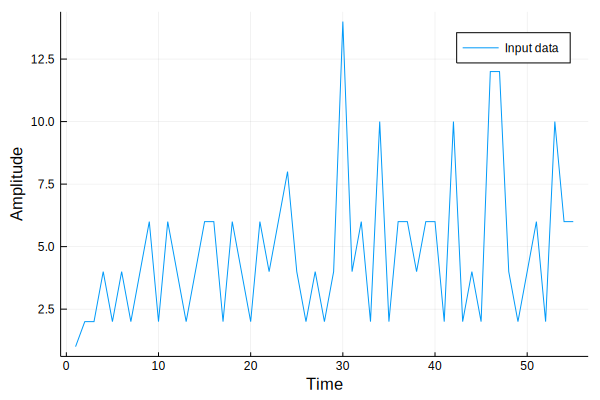

In [3]:
## Plot input data
plt1 = plot(testData, label = "Input data");
xlabel!("Time")
ylabel!("Amplitude")
display(plt1);

In [4]:
## Bootstrap Statistic
# E.g. mean
statisticHandle = mean;
bootstrapSampleHandle = MBBsample;
blockLength = 10;
Nblocks = 5;
NbootstrapReplicates = 200;
fullDataEstimate, replicateEstimate, resampleIndexBB, resampleDataBB = bootstrapStatistic(testData, statisticHandle, bootstrapSampleHandle, blockLength, Nblocks, NbootstrapReplicates);

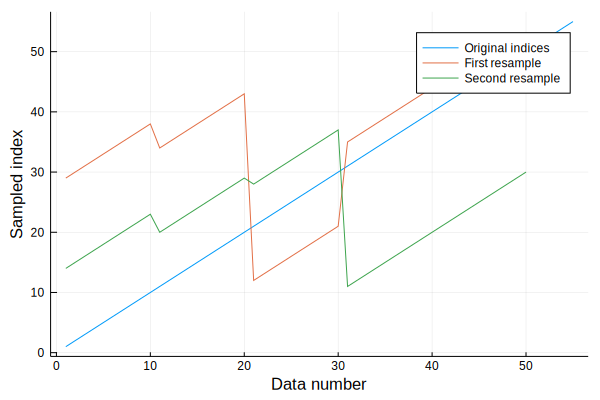

In [5]:
## Plot resampling indices
plt2 = plot(1:dataLength, label = "Original indices");
plot!(resampleIndexBB[1], label = "First resample");
plot!(resampleIndexBB[2], label = "Second resample");
xlabel!("Data number")
ylabel!("Sampled index")
display(plt2);

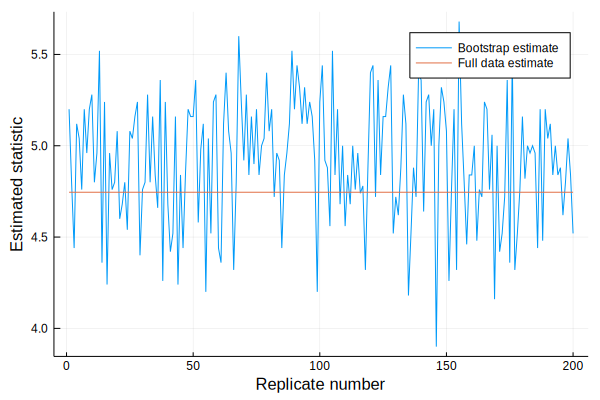

In [6]:
## Plot statistics results
plt3 = plot(replicateEstimate, label = "Bootstrap estimate");
plot!(fullDataEstimate*ones(size(replicateEstimate)), label = "Full data estimate");
xlabel!("Replicate number")
ylabel!("Estimated statistic")
display(plt3);